<a href="https://colab.research.google.com/github/JheanmarcoOscanoa/Laboratorio-N-05/blob/main/Laboratorio_N%C2%B005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRACIÓN, LIMPIEZA Y TRANSFORMACIÓN DE DATOS  
## Laboratorio N°05 – Minería de Datos

**Nombre:** Jheanmarco Deivis OSCANOA VARGAS

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

### Objetivo del laboratorio:


## a. Por medio de la librería ‘Pandas’, lea la base de datos, separe las variables numéricas de las no numéricas tomando en cuenta la información que se encuentra en el repositorio, calcule sus estadísticos descriptivos y halle la matriz de correlación.

In [2]:
"""Cargamos el dataset"""

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df = pd.read_csv(url, header=None)

df.columns = [
    "codigo_muestra",
    "grosor_grumo",
    "uniformidad_tam_celda",
    "uniformidad_forma_celular",
    "adherencia_marginal",
    "tam_epitelio_unico",
    "nucleos_desnudos",
    "cromatina_blanda",
    "nucleolos_normales",
    "mitosis",
    "clase"
]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_muestra             699 non-null    int64 
 1   grosor_grumo               699 non-null    int64 
 2   uniformidad_tam_celda      699 non-null    int64 
 3   uniformidad_forma_celular  699 non-null    int64 
 4   adherencia_marginal        699 non-null    int64 
 5   tam_epitelio_unico         699 non-null    int64 
 6   nucleos_desnudos           699 non-null    object
 7   cromatina_blanda           699 non-null    int64 
 8   nucleolos_normales         699 non-null    int64 
 9   mitosis                    699 non-null    int64 
 10  clase                      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [3]:
df["clase"].unique()


array([2, 4])

In [4]:
# Usamos lambda para mapear los valores 2 → 0 y 4 → 1 en la columna 'Class'
df['clase'] = df['clase'].apply(lambda x: 0 if x == 2 else 1)
y = df['clase']

### a.1 Separar variables numéricas y no numéricas

In [5]:
# Eliminamos la columna de identificación
df_limpio = df.drop(['codigo_muestra', 'clase'], axis=1)

In [6]:
df = df_limpio.copy()

In [7]:
df["nucleos_desnudos"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:

"Dentro de la columna nucleos_desnudos hay datos no númericos como el signo de interrogación , por lo que lo consideramos imputar dicho valor por la mediana"

# Función para imputar valores faltantes con la mediana
def imputar_mediana(col):
    col = col.replace('?', np.nan)
    col = pd.to_numeric(col)
    return col.fillna(col.median())

# Aplicar la función a la columna 'Bare_Nuclei'
df['nucleos_desnudos'] = imputar_mediana(df['nucleos_desnudos'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grosor_grumo               699 non-null    int64  
 1   uniformidad_tam_celda      699 non-null    int64  
 2   uniformidad_forma_celular  699 non-null    int64  
 3   adherencia_marginal        699 non-null    int64  
 4   tam_epitelio_unico         699 non-null    int64  
 5   nucleos_desnudos           699 non-null    float64
 6   cromatina_blanda           699 non-null    int64  
 7   nucleolos_normales         699 non-null    int64  
 8   mitosis                    699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


### **a.2: Calcular estadísticos descriptivos**
Obtener resumen estadístico (como media, desviación, mínimos, máximos, percentiles, etc.) de todas las variables numéricas del dataset.

In [9]:
# 2. Estadísticos Descriptivos
estadisticos = df.describe().T  # Transponer para mejor lectura
print("📊 Estadísticos Descriptivos:\n")
display(estadisticos)


📊 Estadísticos Descriptivos:



,count,mean,std,min,25%,50%,75%,max
grosor_grumo,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniformidad_tam_celda,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniformidad_forma_celular,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
adherencia_marginal,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
tam_epitelio_unico,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
nucleos_desnudos,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
cromatina_blanda,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
nucleolos_normales,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitosis,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


## a.3 Matriz de correlación

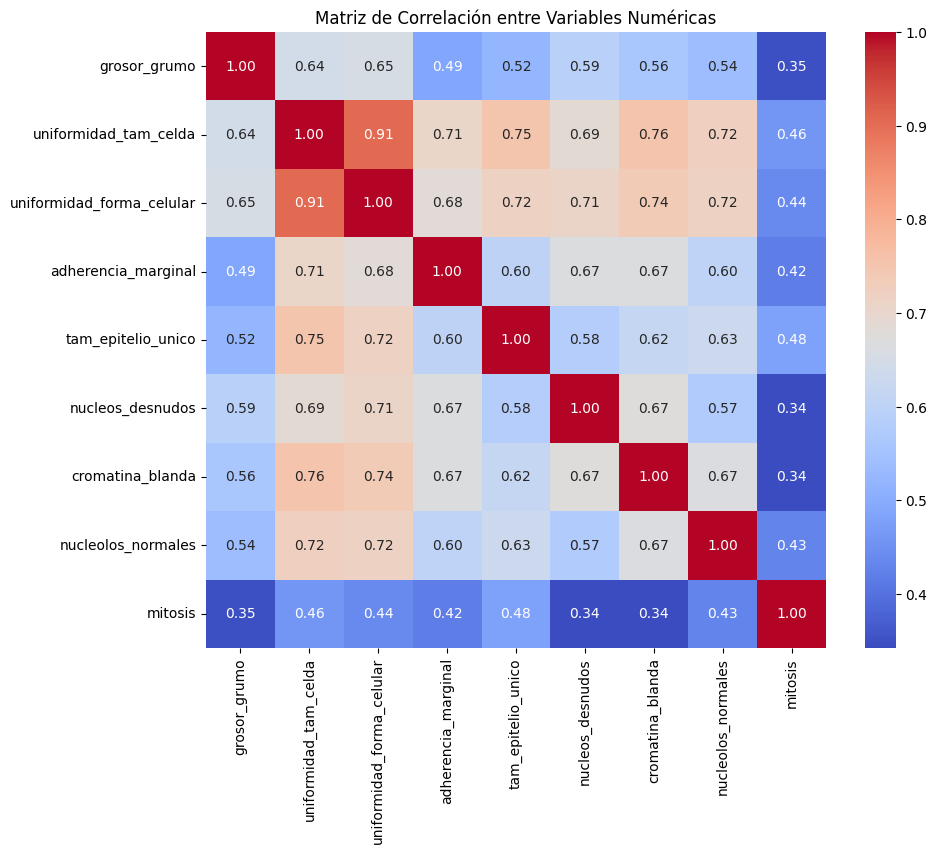

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


El análisis de correlación revela relaciones significativas entre varias variables. Destaca la fuerte correlación (r > 0.90) entre:

Uniformidad del tamaño de la celda y Uniformidad de la forma celular (r = 0.91), lo cual sugiere que ambas características pueden representar un mismo patrón morfológico del tejido celular.

Asimismo, observamos múltiples correlaciones moderadamente altas (r ≈ 0.70–0.76), como por ejemplo entre:

* Cromatina blanda y Uniformidad del tamaño de la celda

* Tamaño de célula epitelial única y Uniformidad del tamaño de la celda

## b. Por medio de la librería ‘Matplotlib’, elabore histogramas, gráficos de densidad, box plot y diagramas de dispersión incluyendo diversos parámetros para estos.

<Figure size 1600x1200 with 0 Axes>

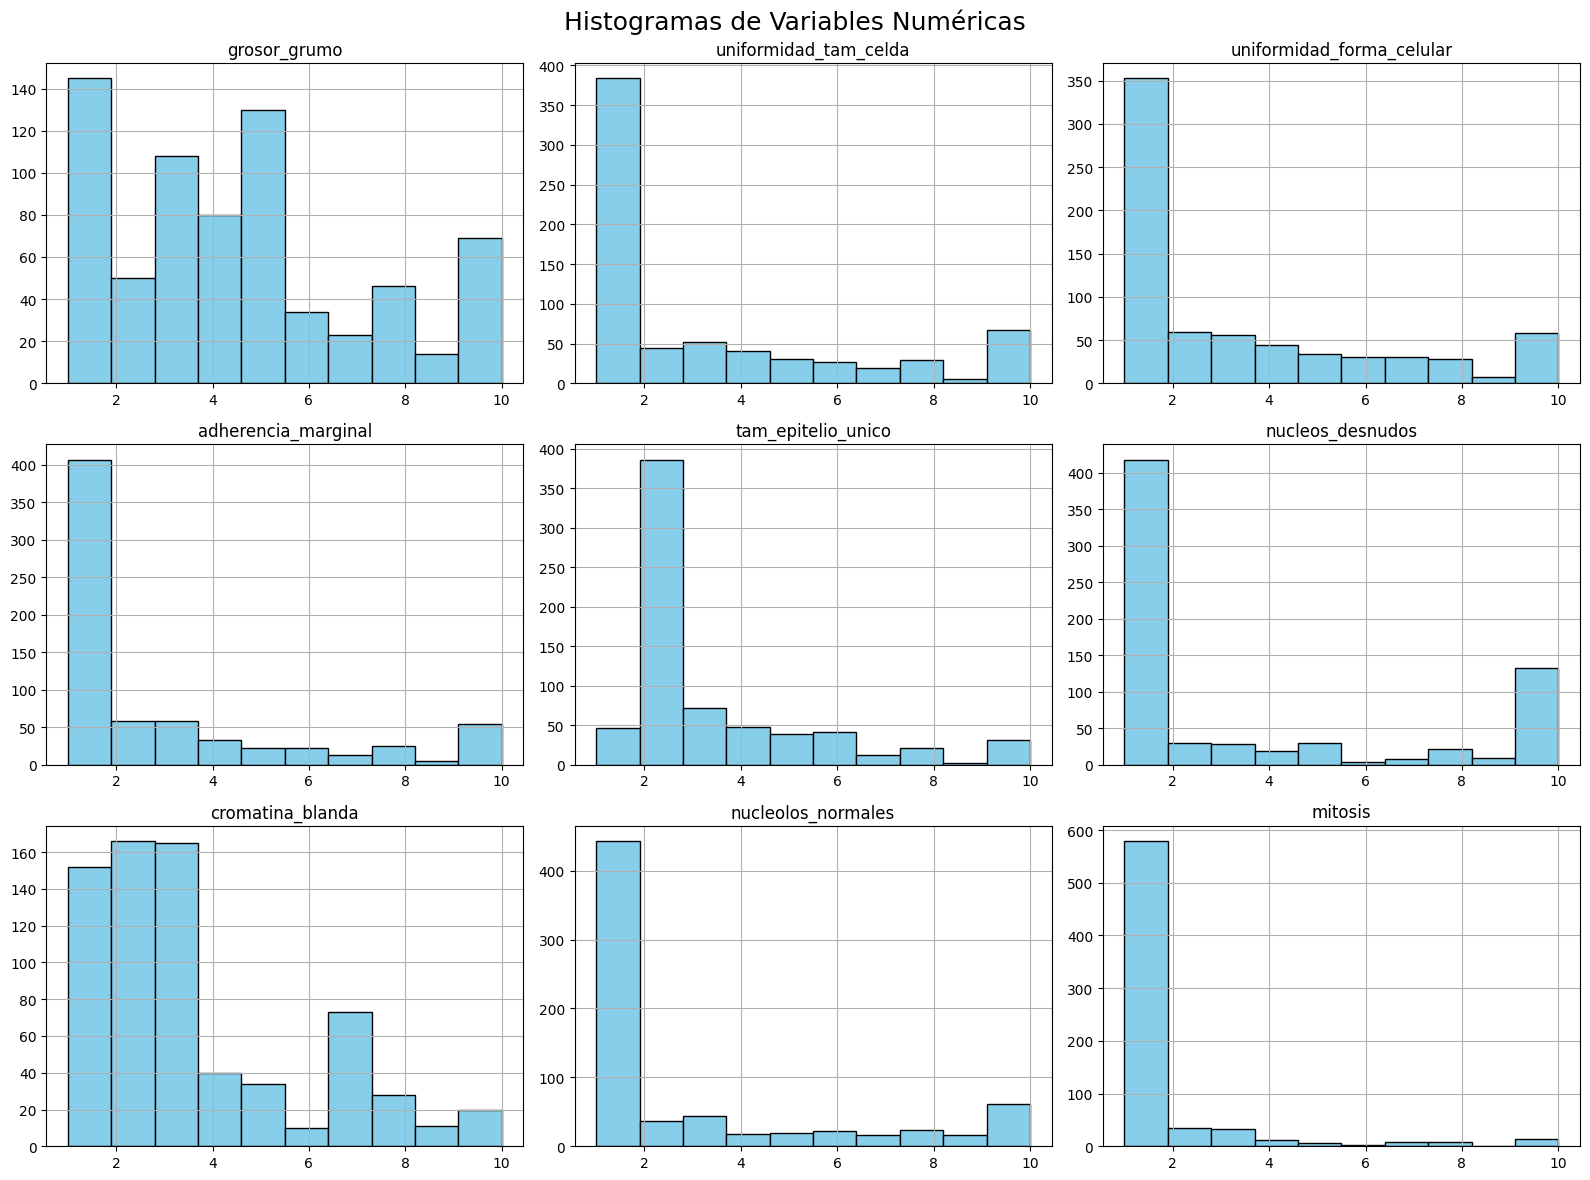

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
df.hist(bins=10, color='skyblue', edgecolor='black', figsize=(16, 12))
plt.suptitle('Histogramas de Variables Numéricas', fontsize=18)
plt.tight_layout()
plt.show()


Se generan histogramas para visualizar la distribución de frecuencia de cada variable numérica. Esto permite observar si los datos están distribuidos de forma normal, sesgada o si presentan valores extremos.

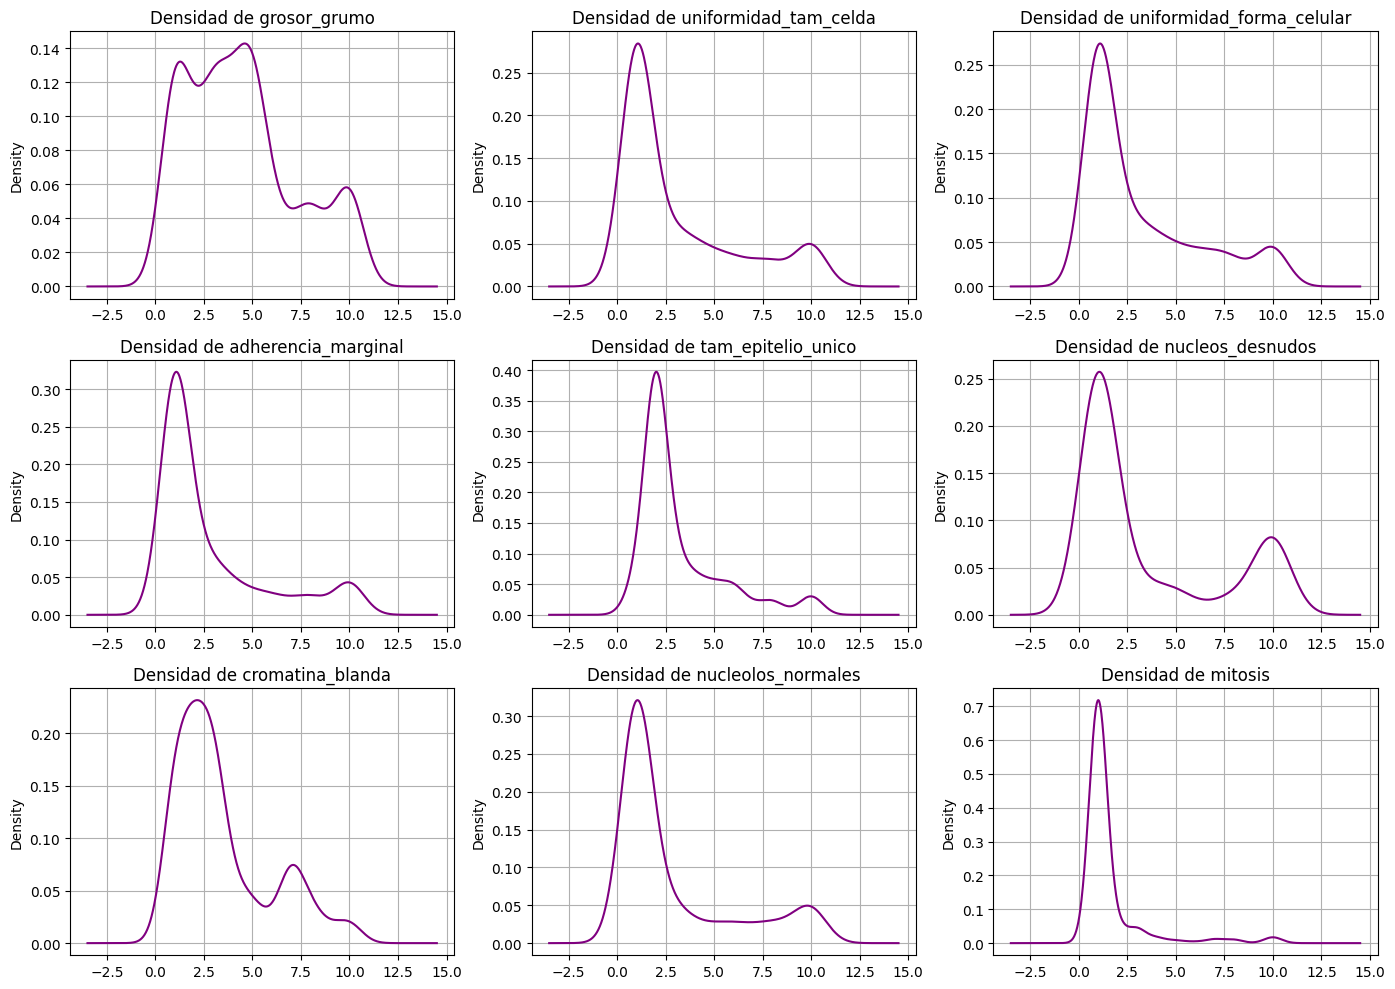

In [12]:
# Gráficos de densidad (KDE)
plt.figure(figsize=(14, 10))
for i, columna in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[columna].plot(kind='kde', color='purple')
    plt.title(f'Densidad de {columna}')
    plt.grid(True)
plt.tight_layout()
plt.show()


Los gráficos de densidad permiten estimar la distribución de probabilidad de las variables numéricas, siendo útiles para comparar formas de distribución y detectar multimodalidad.

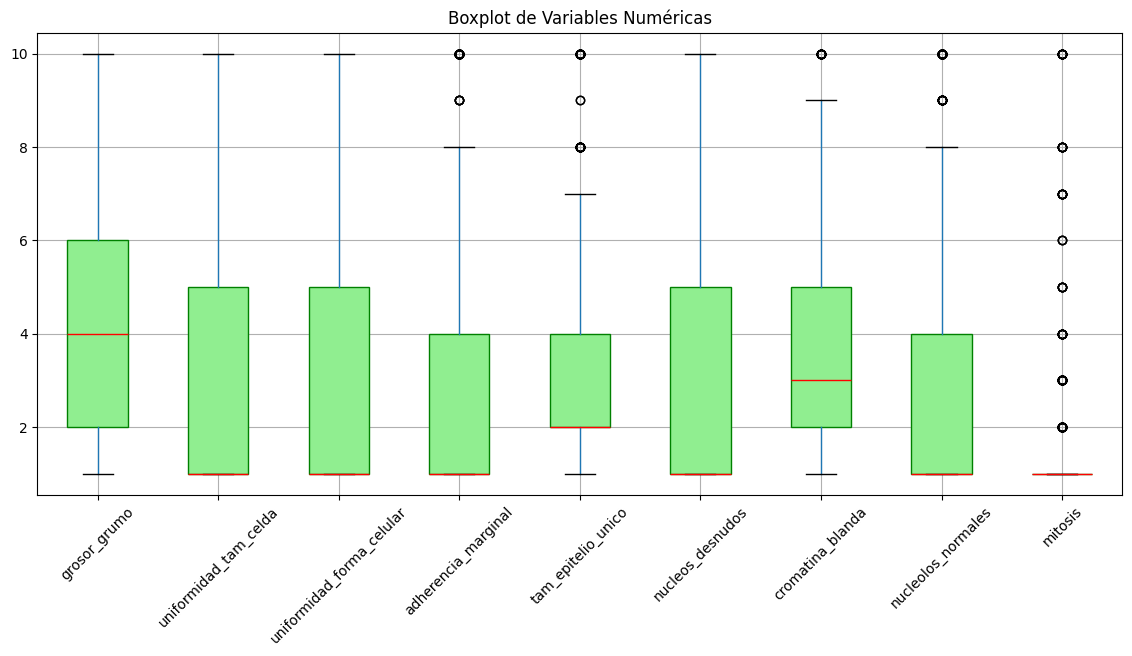

In [13]:
# Diagramas de caja (Boxplot)
plt.figure(figsize=(14, 6))
df.boxplot(rot=45, patch_artist=True,
           boxprops=dict(facecolor='lightgreen', color='green'),
           medianprops=dict(color='red'))
plt.title('Boxplot de Variables Numéricas')
plt.grid(True)
plt.show()



El boxplot ayuda a identificar valores atípicos (outliers), la mediana, el rango intercuartílico y la simetría de los datos.

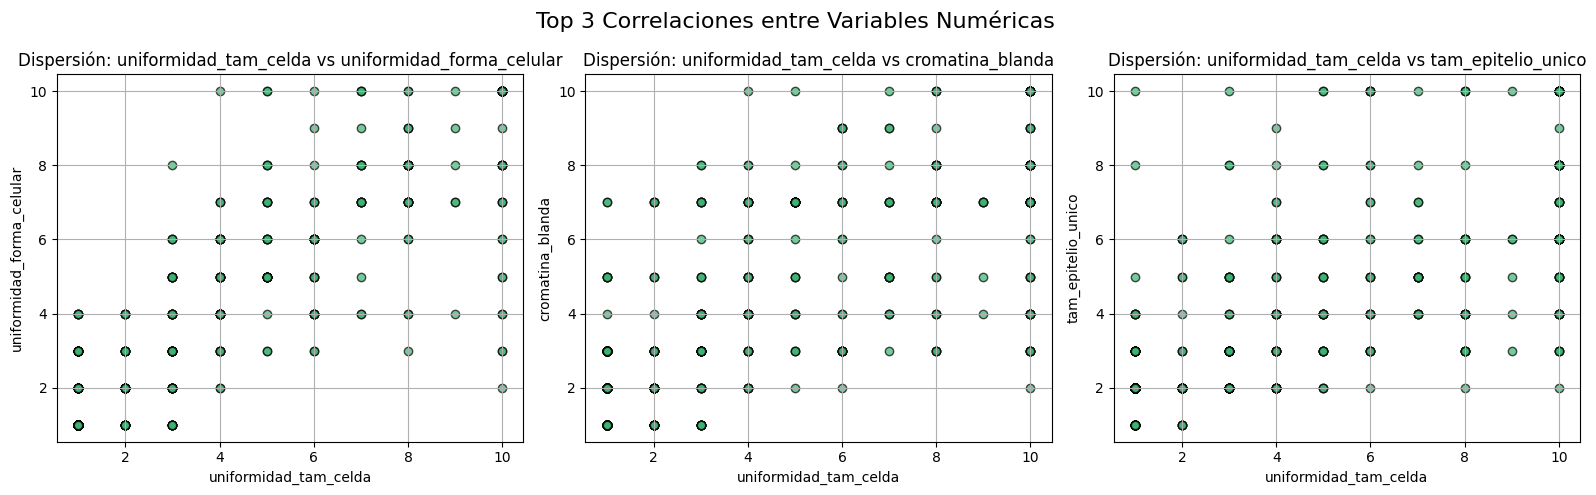

In [14]:
import numpy as np

# Obtener la matriz de correlación
cor_matrix = df.corr().abs()

# Seleccionar solo la parte superior del triángulo para evitar duplicados
mask = np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)
upper_triangle = cor_matrix.where(mask)

# Extraer los 3 pares de variables con mayor correlación
top_corr_pairs = (
    upper_triangle.stack()
    .sort_values(ascending=False)
    .head(3)
)

top_corr_pairs


# Graficar los 3 pares con mayor correlación
plt.figure(figsize=(16, 5))

for i, (var1, var2) in enumerate(top_corr_pairs.index, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[var1], df[var2], alpha=0.7, edgecolors='k', color='mediumseagreen')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'Dispersión: {var1} vs {var2}')
    plt.grid(True)

plt.suptitle('Top 3 Correlaciones entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()


## c. Utilice la librería ‘Scikit-learn’ para separar la información en datos de entrenamiento y prueba. Además, implemente un modelo k-NN con dicha información, realice pronósticos y mida la precisión para los datos de entrenamiento y prueba.

In [15]:
# Reimportar librerías y recrear todo tras reinicio de kernel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Separar variables predictoras y variable objetivo
X = df
X


,grosor_grumo,uniformidad_tam_celda,uniformidad_forma_celular,adherencia_marginal,tam_epitelio_unico,nucleos_desnudos,cromatina_blanda,nucleolos_normales,mitosis
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [16]:
y

,clase
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [17]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir el conjunto de datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)

In [18]:
# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Realizar predicciones en ambos conjuntos
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [20]:
# Medir precisión en entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Mostrar resultados
print("Precisión en el conjunto de ENTRENAMIENTO: {:.2f}%".format(accuracy_train * 100))
print("Precisión en el conjunto de PRUEBA: {:.2f}%".format(accuracy_test * 100))

Precisión en el conjunto de ENTRENAMIENTO: 97.50%
Precisión en el conjunto de PRUEBA: 98.57%


In [23]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

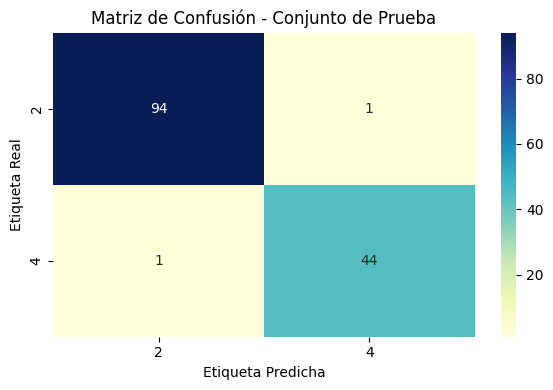

In [24]:
# Visualizar matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=[2, 4], yticklabels=[2, 4])
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()